In [51]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt


df1 = pd.read_csv('googleplaystore.csv') 
df1



,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [52]:
data = df1[['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Content Rating']].groupby(['App']).max().dropna().reset_index()
data["Installs"] = pd.to_numeric(data["Installs"].str.replace(",","").str.replace("+",""))
data["Reviews"] = pd.to_numeric(data["Reviews"])
mydata = data[['App',"Type", 'Size','Category', 'Content Rating', "Rating", "Reviews", "Installs"]]
mydata

C:\Users\andrz\AppData\Local\Temp/ipykernel_26448/2642007296.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data["Installs"] = pd.to_numeric(data["Installs"].str.replace(",","").str.replace("+",""))


,App,Type,Size,Category,Content Rating,Rating,Reviews,Installs
0,+Download 4 Instagram Twitter,Free,22M,SOCIAL,Everyone,4.5,40467,1000000
1,- Free Comics - Comic Apps,Free,9.1M,COMICS,Mature 17+,3.5,115,10000
2,.R,Free,203k,TOOLS,Everyone,4.5,259,10000
3,/u/app,Free,53M,COMMUNICATION,Mature 17+,4.7,573,10000
4,058.ba,Free,14M,NEWS_AND_MAGAZINES,Everyone,4.4,27,100
...,...,...,...,...,...,...,...,...
8191,감성학원 BL 첫사랑,Free,34M,COMICS,Everyone,4.4,190,10000
8192,💎 I'm rich,Paid,26M,LIFESTYLE,Everyone,3.8,718,10000
8193,"💘 WhatsLov: Smileys of love, stickers and GIF",Free,18M,SOCIAL,Everyone,4.6,22098,1000000
8194,📏 Smart Ruler ↔️ cm/inch measuring for homework!,Free,3.2M,TOOLS,Everyone,4.0,19,10000


In [53]:
size = mydata[:]
size = size[size["Size"] != "Varies with device"]
size["Size number"] = pd.to_numeric(size["Size"].str[:-1])
size["Size units"] = size["Size"].str[-1:]
size["unit bytes"] = size["Size units"].apply(lambda x: 1/1024 if x == "k" else 1)
size["unit bytes"] = pd.to_numeric(size["unit bytes"])
size["Size mb"] = size["Size number"] * size["unit bytes"]
mydata= size.iloc[:,[0,1,2,3,4,5,6,7,11]]
mydata

,App,Type,Size,Category,Content Rating,Rating,Reviews,Installs,Size mb
0,+Download 4 Instagram Twitter,Free,22M,SOCIAL,Everyone,4.5,40467,1000000,22.000000
1,- Free Comics - Comic Apps,Free,9.1M,COMICS,Mature 17+,3.5,115,10000,9.100000
2,.R,Free,203k,TOOLS,Everyone,4.5,259,10000,0.198242
3,/u/app,Free,53M,COMMUNICATION,Mature 17+,4.7,573,10000,53.000000
4,058.ba,Free,14M,NEWS_AND_MAGAZINES,Everyone,4.4,27,100,14.000000
...,...,...,...,...,...,...,...,...,...
8191,감성학원 BL 첫사랑,Free,34M,COMICS,Everyone,4.4,190,10000,34.000000
8192,💎 I'm rich,Paid,26M,LIFESTYLE,Everyone,3.8,718,10000,26.000000
8193,"💘 WhatsLov: Smileys of love, stickers and GIF",Free,18M,SOCIAL,Everyone,4.6,22098,1000000,18.000000
8194,📏 Smart Ruler ↔️ cm/inch measuring for homework!,Free,3.2M,TOOLS,Everyone,4.0,19,10000,3.200000


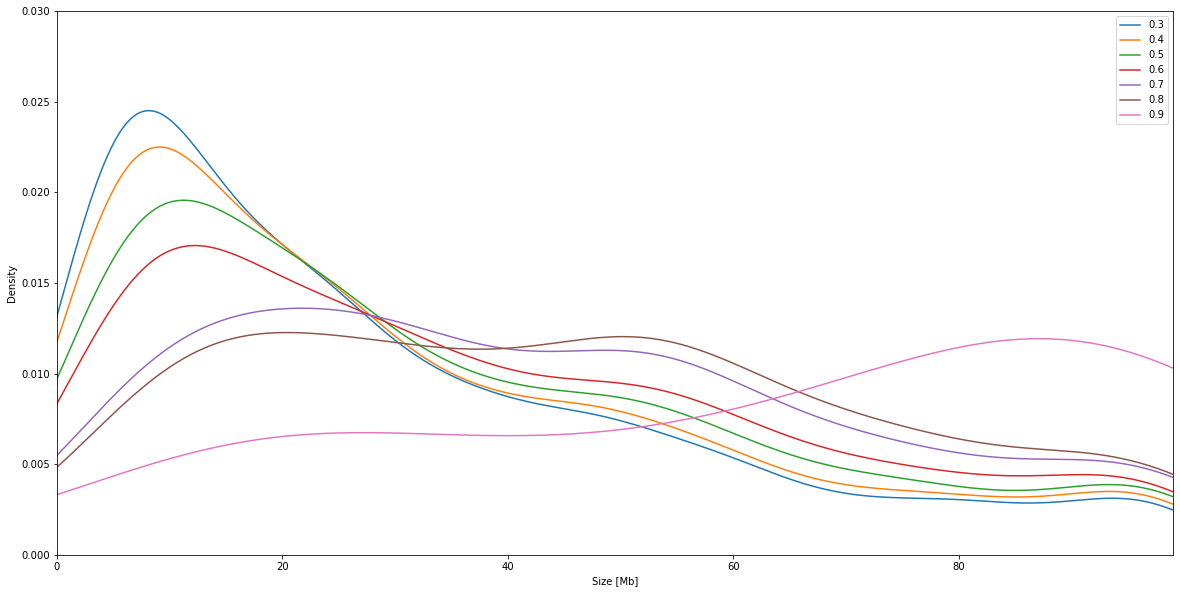

In [54]:
plt.figure(figsize=(20,10))
quantiles = np.arange(0.3, 1, 0.1).round(1)
quantiles.round()
for q in quantiles:
    # if q =0.8:

    t = size[size["Installs"] > size["Installs"].quantile(q)]
    t = t[t["Reviews"] > t["Reviews"].quantile(q)]
    t["Size mb"].plot.density(xlim=(0,t["Size mb"].max()), ylim=(0,.03))
    plt.xlabel("Size [Mb]")
    plt.legend(quantiles)
pass

In [55]:
mydata['App'].duplicated().sum()

0

In [56]:
avg_rev =mydata['Reviews'].mean()
avg_inst = mydata['Installs'].mean()
avg_rat = mydata['Rating'].mean()

In [57]:
corr =mydata.corr(method='pearson') ## Get pairwise correlation coefficients
corr

,Rating,Reviews,Installs,Size mb
Rating,1.000000,0.067501,0.047638,0.062928
Reviews,0.067501,1.000000,0.595614,0.180551
Installs,0.047638,0.595614,1.000000,0.131718
Size mb,0.062928,0.180551,0.131718,1.000000


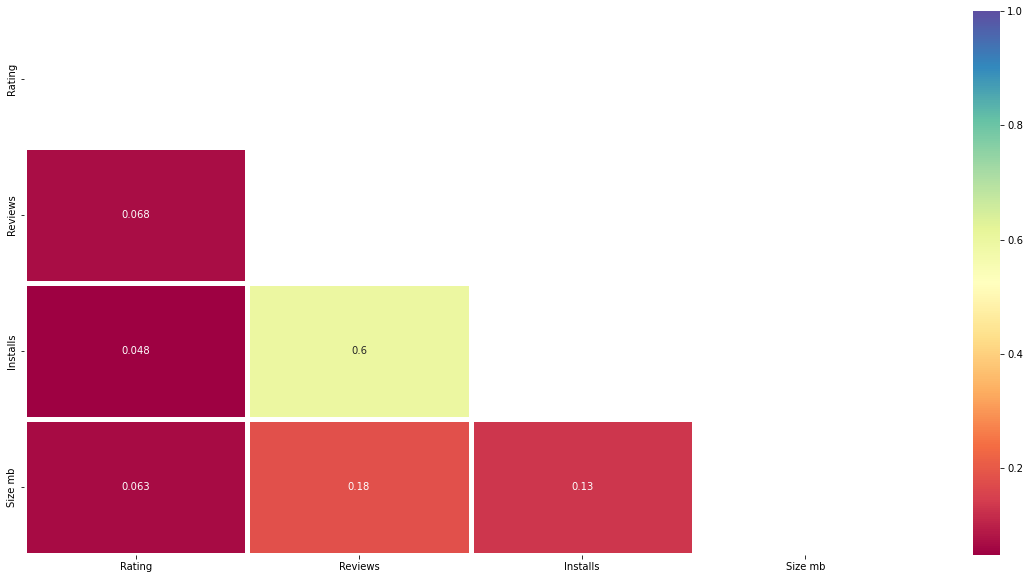

In [58]:
import seaborn as sns
plt.figure(figsize=(20,10))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
hetmap = sns.heatmap(corr, annot=True, cmap = 'Spectral', linewidths=5, mask=mask, vmax=1)

In [59]:
import math
# Independent variables

x = 'Installs'
y = 'Rating'

# Dependent variable
z = 'Reviews'

# Pairings
xz = corr.loc[ x, z ]
yz = corr.loc[ y, z ]
xy = corr.loc[ x, y ]

Rxyz = math.sqrt((abs(xz**2) + abs(yz**2) - 2*xz*yz*xy) / (1-abs(xy**2)) )
R2 = Rxyz**2

# Calculate adjusted R-squared
n = len(mydata) # Number of rows
k = 2       # Number of independent variables
R2_adj = 1 - ( ((1-R2)*(n-1)) / (n-k-1) )

print(R2, R2_adj)

print('Results show that Reviews is almost 38-39% dependent on/correlated with Installs and Rating.')

print('Base on http://www.real-statistics.com/correlation/multiple-correlation/')


0.35629092413414365 0.3561075834688443
Results show that Reviews is almost 38-39% dependent on/correlated with Installs and Rating.
Base on http://www.real-statistics.com/correlation/multiple-correlation/


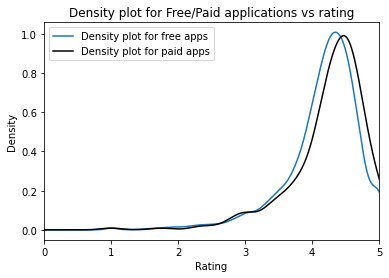

In [60]:
data_type = mydata[['App', 'Type', 'Rating', 'Installs', 'Reviews']]


free_type =data_type[data_type['Type']== 'Free']
paid_type =data_type[data_type['Type']== 'Paid']

import matplotlib.pyplot as plt


free_type['Rating'].plot.density(xlim=(0, free_type['Rating'].max()))
paid_type['Rating'].plot.density(xlim=(0, paid_type['Rating'].max()),color = 'k')
plt.title('Density plot for Free/Paid applications vs rating')
plt.xlabel('Rating')
plt.legend(['Density plot for free apps', 'Density plot for paid apps'])

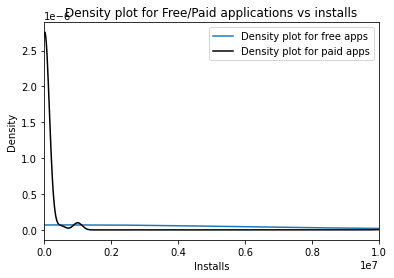

In [61]:
free_type =data_type[data_type['Type']== 'Free']
paid_type =data_type[data_type['Type']== 'Paid']

import matplotlib.pyplot as plt
import seaborn as sns


free_type['Installs'].plot.density(xlim=(0, free_type['Installs'].max()))
paid_type['Installs'].plot.density(xlim=(0, paid_type['Installs'].max()),color = 'k')
plt.title('Density plot for Free/Paid applications vs installs')
plt.xlabel('Installs')
plt.legend(['Density plot for free apps', 'Density plot for paid apps'])

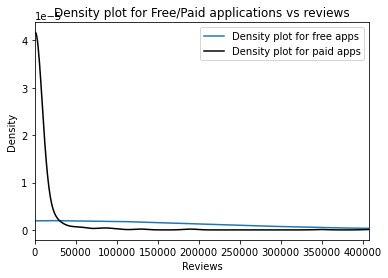

In [62]:
free_type["Reviews"].plot.density(xlim=(0, free_type['Reviews'].max()))
paid_type['Reviews'].plot.density(xlim=(0, paid_type['Reviews'].max()),color = 'k')
plt.title('Density plot for Free/Paid applications vs reviews')
plt.xlabel('Reviews')
plt.legend(['Density plot for free apps', 'Density plot for paid apps'])

<AxesSubplot:ylabel='Density'>

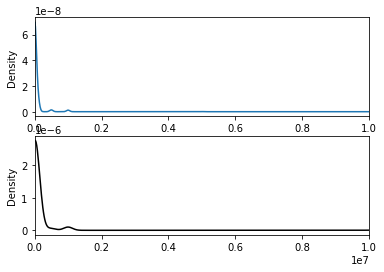

In [63]:
#przebieg dla 'Installs' bez usuwania outlines - na dwóch różnych wykresach

plt.subplot(2,1,1)
free_type['Installs'].plot.density(xlim=(0, free_type['Installs'].max()))
plt.subplot(2,1,2)
paid_type['Installs'].plot.density(xlim=(0, paid_type['Installs'].max()),color = 'k')

In [64]:
roz_mean_i =round(free_type['Installs'].mean() - paid_type['Installs'].mean(), 2)
roz_mean_i

4760289.28

In [65]:
roz_mean_r =round(free_type['Reviews'].mean() - paid_type['Reviews'].mean(), 2)
roz_mean_r

149350.63

In [66]:
stos_mean_i = round(free_type['Installs'].mean()/paid_type['Installs'].mean(), 2)
stos_mean_i

61.6

In [67]:
stos_mean_r = round(free_type['Reviews'].mean()/paid_type['Reviews'].mean(), 2)
stos_mean_r

22.71

In [68]:
avg_free = data_type[data_type['Type']== 'Free']['Rating'].mean()
avg_paid = data_type[data_type['Type']== 'Paid']['Rating'].mean()


print(f'Średnia ocena aplikacji darmowej to : {avg_free}, natomiast płatnej to: {avg_paid}')

Średnia ocena aplikacji darmowej to : 4.153631457208936, natomiast płatnej to: 4.2475925925925875


In [69]:
avg_free_r = data_type[data_type['Type']== 'Free']['Reviews'].mean()
avg_paid_r = data_type[data_type['Type']== 'Paid']['Reviews'].mean()


print(f'Średnia liczba recenzji aplikacji darmowej to : {avg_free_r}, natomiast płatnej to: {avg_paid_r}')

Średnia liczba recenzji aplikacji darmowej to : 156231.10177332305, natomiast płatnej to: 6880.475925925926


In [70]:
avg_free_i = data_type[data_type['Type']== 'Free']['Installs'].mean()
avg_paid_i = data_type[data_type['Type']== 'Paid']['Installs'].mean()


print(f'Średnia liczba pobrań aplikacji darmowej to : {avg_free_i}, natomiast płatnej to: {avg_paid_i}')

Średnia liczba pobrań aplikacji darmowej to : 4838840.545258288, natomiast płatnej to: 78551.26296296297


In [71]:
#statystyka - bez usuniecia outlines

s1 = data_type.groupby(by='Type').describe()['Rating']
s2 = data_type.groupby(by='Type').describe()['Reviews']
s3 = data_type.groupby(by='Type').describe()['Installs']

In [72]:
s1

,count,mean,std,min,25%,50%,75%,max
Type,,,,,,,,
Free,6485.0,4.153631,0.557870,1.0,4.0,4.3,4.5,5.0
Paid,540.0,4.247593,0.564153,1.0,4.1,4.4,4.6,5.0


In [73]:
s2

,count,mean,std,min,25%,50%,75%,max
Type,,,,,,,,
Free,6485.0,156231.101773,1.065234e+06,1.0,99.00,2000.0,31134.00,44893888.0
Paid,540.0,6880.475926,2.946659e+04,1.0,24.75,167.5,1469.75,408292.0


In [74]:
s3

,count,mean,std,min,25%,50%,75%,max
Type,,,,,,,,
Free,6485.0,4.838841e+06,2.822344e+07,1.0,10000.0,100000.0,1000000.0,1.000000e+09
Paid,540.0,7.855126e+04,4.676897e+05,1.0,1000.0,5000.0,10000.0,1.000000e+07


<AxesSubplot:>

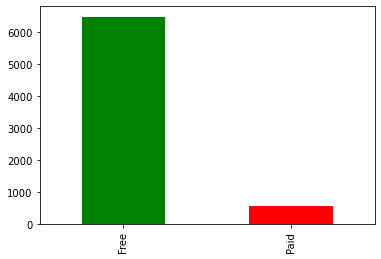

In [75]:
mydata['Type'].value_counts().plot(kind='bar', color=('green', 'red'))

In [76]:
# free_type = mydata[mydata['Type']== 'Free']
# free_type


In [77]:
# free_type.dtypes

TOP 10 kategorii według 'Rating'

In [78]:
cat_rating = mydata[["Category","Rating"]].groupby("Category").describe().reset_index()
cat_rating.columns = cat_rating.columns.droplevel()
cat_rating = cat_rating.sort_values("count", ascending=False)
cat_rating.columns = ["Category", "count", "mean", "std", "min", "25%", "50%", "75%", "max"]
cat_rating.iloc[:10]

,Category,count,mean,std,min,25%,50%,75%,max
11,FAMILY,1536.0,4.182292,0.523903,1.0,4.000,4.3,4.5,5.0
14,GAME,830.0,4.234699,0.394046,1.0,4.100,4.3,4.5,5.0
29,TOOLS,627.0,4.007018,0.640424,1.0,3.800,4.2,4.4,5.0
23,PERSONALIZATION,276.0,4.325362,0.368991,2.5,4.175,4.4,4.6,5.0
18,LIFESTYLE,269.0,4.089963,0.726222,1.5,3.800,4.2,4.6,5.0
20,MEDICAL,266.0,4.163534,0.705654,1.0,3.900,4.3,4.6,5.0
12,FINANCE,258.0,4.104651,0.694712,1.0,3.900,4.3,4.5,5.0
25,PRODUCTIVITY,223.0,4.132735,0.589514,1.0,4.000,4.2,4.5,5.0
28,SPORTS,223.0,4.204036,0.483448,1.5,4.000,4.3,4.5,5.0
4,BUSINESS,221.0,4.094118,0.689342,1.0,3.800,4.3,4.5,5.0


TOP 10 kategorii według 'Reviews' - sortowane po ilości

In [79]:
cat_reviews = mydata[["Category","Reviews"]].groupby("Category").describe().reset_index()
cat_reviews.columns = cat_reviews.columns.droplevel()
cat_reviews = cat_reviews.sort_values("count", ascending=False)
cat_reviews.columns = ["Category reviews - by count", "count", "mean", "std", "min", "25%", "50%", "75%", "max"]
cat_reviews.iloc[:10]

,Category reviews - by count,count,mean,std,min,25%,50%,75%,max
11,FAMILY,1536.0,76562.569010,3.853526e+05,1.0,76.75,1218.0,20816.00,10053186.0
14,GAME,830.0,601014.001205,2.508922e+06,1.0,1705.00,26696.5,214863.25,44893888.0
29,TOOLS,627.0,133085.401914,9.154742e+05,1.0,55.00,605.0,13034.50,13479633.0
23,PERSONALIZATION,276.0,101697.460145,6.008028e+05,1.0,58.25,763.5,25229.50,6702776.0
18,LIFESTYLE,269.0,28508.185874,1.854289e+05,1.0,33.00,386.0,6667.00,2789775.0
20,MEDICAL,266.0,3894.560150,1.627624e+04,1.0,14.25,66.0,530.50,156410.0
12,FINANCE,258.0,34377.453488,1.478399e+05,1.0,70.50,460.0,8071.50,1374549.0
25,PRODUCTIVITY,223.0,104201.569507,4.757436e+05,1.0,56.00,1905.0,22932.00,5383985.0
28,SPORTS,223.0,220714.322870,1.209095e+06,1.0,315.00,3017.0,50098.00,14201891.0
4,BUSINESS,221.0,19013.475113,9.269955e+04,1.0,14.00,102.0,2287.00,1002861.0


TOP 10 kategorii według 'Reviews' - sortowane po średniej

In [80]:
cat_reviews = mydata[["Category","Reviews"]].groupby("Category").describe().reset_index()
cat_reviews.columns = cat_reviews.columns.droplevel()
cat_reviews = cat_reviews.sort_values("mean", ascending=False)
cat_reviews.columns = ["Category reviews - by mean", "count", "mean", "std", "min", "25%", "50%", "75%", "max"]
cat_reviews.iloc[:10]

,Category reviews - by mean,count,mean,std,min,25%,50%,75%,max
14,GAME,830.0,601014.001205,2.508922e+06,1.0,1705.00,26696.5,214863.25,44893888.0
6,COMMUNICATION,189.0,243888.365079,1.411620e+06,1.0,62.00,1711.0,42370.00,17714850.0
28,SPORTS,223.0,220714.322870,1.209095e+06,1.0,315.00,3017.0,50098.00,14201891.0
31,VIDEO_PLAYERS,113.0,206084.300885,9.828883e+05,3.0,83.00,3930.0,58820.00,9879473.0
24,PHOTOGRAPHY,204.0,188369.980392,7.011605e+05,1.0,332.00,12649.0,90076.50,7594559.0
29,TOOLS,627.0,133085.401914,9.154742e+05,1.0,55.00,605.0,13034.50,13479633.0
27,SOCIAL,156.0,131714.250000,5.284577e+05,2.0,83.75,3059.0,41005.50,5637451.0
9,ENTERTAINMENT,53.0,127863.905660,2.937419e+05,303.0,8674.00,23666.0,67554.00,1828284.0
26,SHOPPING,146.0,118756.417808,5.344290e+05,1.0,458.00,9962.5,68072.25,6212081.0
25,PRODUCTIVITY,223.0,104201.569507,4.757436e+05,1.0,56.00,1905.0,22932.00,5383985.0


TOP 10 kategorii według 'Installs' - sortowane po ilości

In [81]:
cat_installs = mydata[["Category","Installs"]].groupby("Category").describe().reset_index()
cat_installs.columns = cat_installs.columns.droplevel()
cat_installs = cat_installs.sort_values("count", ascending=False)
cat_installs.columns = ["Category installs - by count", "count", "mean", "std", "min", "25%", "50%", "75%", "max"]
cat_installs.iloc[:10]

,Category installs - by count,count,mean,std,min,25%,50%,75%,max
11,FAMILY,1536.0,2.448706e+06,9.132286e+06,10.0,5000.0,100000.0,1000000.0,1.000000e+08
14,GAME,830.0,1.368368e+07,5.128445e+07,1.0,100000.0,1000000.0,10000000.0,1.000000e+09
29,TOOLS,627.0,4.593403e+06,2.423732e+07,10.0,5000.0,100000.0,1000000.0,5.000000e+08
23,PERSONALIZATION,276.0,3.243271e+06,1.280537e+07,10.0,1000.0,50000.0,1000000.0,1.000000e+08
18,LIFESTYLE,269.0,1.503789e+06,7.125822e+06,10.0,1000.0,50000.0,1000000.0,1.000000e+08
20,MEDICAL,266.0,1.189852e+05,4.765534e+05,1.0,1000.0,7500.0,50000.0,5.000000e+06
12,FINANCE,258.0,9.480128e+05,3.682576e+06,50.0,5000.0,10000.0,500000.0,5.000000e+07
25,PRODUCTIVITY,223.0,5.790592e+06,3.580145e+07,10.0,5000.0,100000.0,1000000.0,5.000000e+08
28,SPORTS,223.0,4.512607e+06,1.478034e+07,5.0,10000.0,100000.0,3000000.0,1.000000e+08
4,BUSINESS,221.0,1.725262e+06,1.016193e+07,5.0,1000.0,10000.0,100000.0,1.000000e+08


TOP 10 kategorii według 'Installs' - sortowane po średniej

In [82]:
cat_installs = mydata[["Category","Installs"]].groupby("Category").describe().reset_index()
cat_installs.columns = cat_installs.columns.droplevel()
cat_installs = cat_installs.sort_values("mean", ascending=False)
cat_installs.columns = ["Category", "count", "mean", "std", "min", "25%", "50%", "75%", "max"]
cat_installs.iloc[:10]

,Category,count,mean,std,min,25%,50%,75%,max
14,GAME,830.0,1.368368e+07,5.128445e+07,1.0,100000.0,1000000.0,10000000.0,1.000000e+09
6,COMMUNICATION,189.0,9.645056e+06,5.298669e+07,10.0,5000.0,100000.0,5000000.0,5.000000e+08
9,ENTERTAINMENT,53.0,9.065283e+06,2.154773e+07,10000.0,1000000.0,1000000.0,10000000.0,1.000000e+08
21,NEWS_AND_MAGAZINES,154.0,7.733120e+06,8.053122e+07,50.0,5000.0,50000.0,1000000.0,1.000000e+09
31,VIDEO_PLAYERS,113.0,7.713825e+06,1.950853e+07,100.0,10000.0,500000.0,5000000.0,1.000000e+08
24,PHOTOGRAPHY,204.0,7.367123e+06,1.869847e+07,10.0,50000.0,1000000.0,10000000.0,1.000000e+08
25,PRODUCTIVITY,223.0,5.790592e+06,3.580145e+07,10.0,5000.0,100000.0,1000000.0,5.000000e+08
26,SHOPPING,146.0,4.868024e+06,1.311608e+07,10.0,100000.0,1000000.0,5000000.0,1.000000e+08
29,TOOLS,627.0,4.593403e+06,2.423732e+07,10.0,5000.0,100000.0,1000000.0,5.000000e+08
28,SPORTS,223.0,4.512607e+06,1.478034e+07,5.0,10000.0,100000.0,3000000.0,1.000000e+08


Histogram 'Reviews'

8196


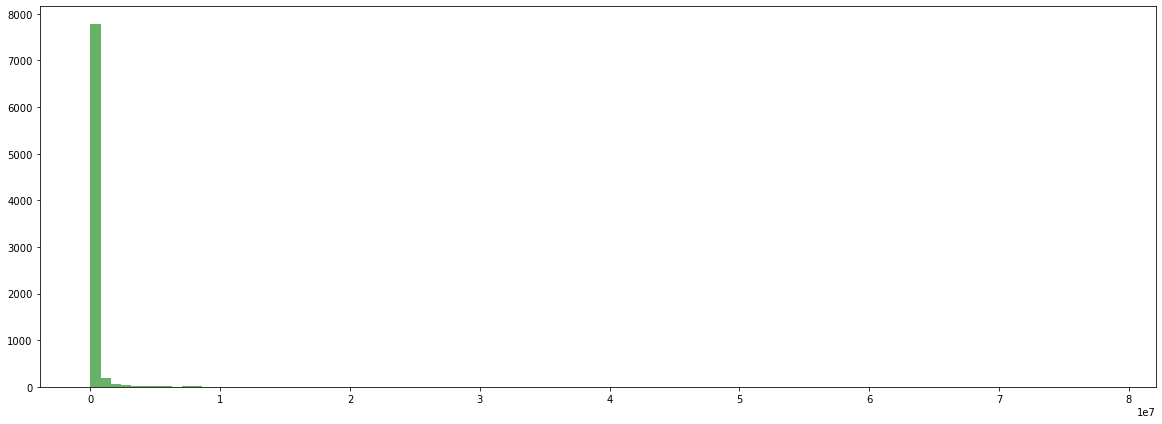

In [83]:
fig = plt.figure(figsize=(20, 7))
plot_data = data["Reviews"]
print(len(plot_data))

plt.hist(plot_data, bins=100, alpha=0.6, color='g')
plt.show()

Histogram 'Reviews' kwantyla 0.8

1639


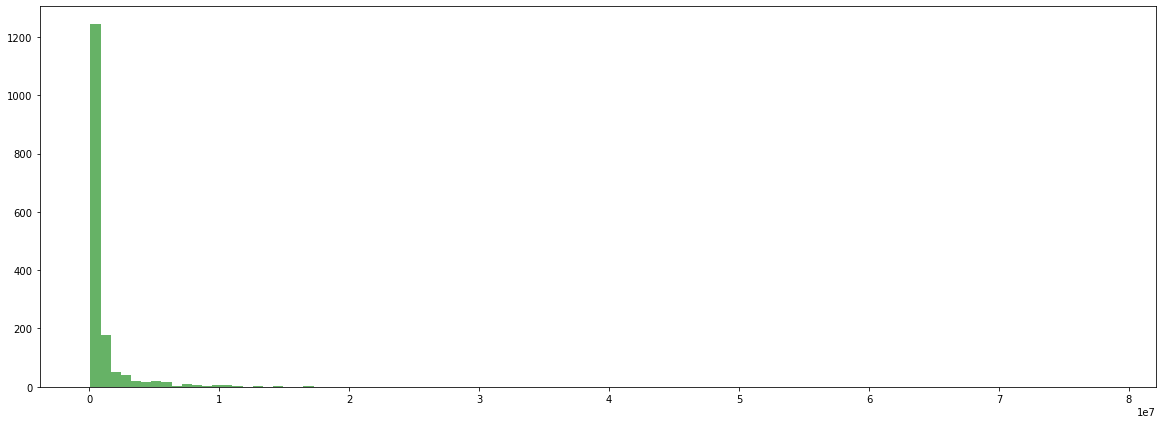

In [84]:
fig = plt.figure(figsize=(20, 7))
plot_data2 = data["Reviews"]
plot_data2 = plot_data2[plot_data2 > plot_data2.quantile(.8)]
print(len(plot_data2))

plt.hist(plot_data2, bins=100, alpha=0.6, color='g')
plt.show()

In [85]:
rev_scores = mydata.sort_values(["Installs","Reviews"], ascending=False)
rev_scores = rev_scores.groupby(["Category"]).count().reset_index()
print("ilość aplikacji", rev_scores["App"].sum())
print("ilość kategorii", rev_scores["Category"].count())
rev_scores["Score"] = round(rev_scores["App"]/min(rev_scores["App"]))
cat_rank =rev_scores.iloc[:,[0,1,-1]].sort_values(["App"], ascending=False)
category_score =cat_rank[['Category', 'Score']]
cat_rank

ilość aplikacji 7025
ilość kategorii 33


,Category,App,Score
11,FAMILY,1536,42.0
14,GAME,830,22.0
29,TOOLS,627,17.0
23,PERSONALIZATION,276,7.0
18,LIFESTYLE,269,7.0
20,MEDICAL,266,7.0
12,FINANCE,258,7.0
25,PRODUCTIVITY,223,6.0
28,SPORTS,223,6.0
4,BUSINESS,221,6.0


In [86]:
mydata['Size category'] = mydata['Size mb'] // 10
mydata

C:\Users\andrz\AppData\Local\Temp/ipykernel_26448/4155873510.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mydata['Size category'] = mydata['Size mb'] // 10


,App,Type,Size,Category,Content Rating,Rating,Reviews,Installs,Size mb,Size category
0,+Download 4 Instagram Twitter,Free,22M,SOCIAL,Everyone,4.5,40467,1000000,22.000000,2.0
1,- Free Comics - Comic Apps,Free,9.1M,COMICS,Mature 17+,3.5,115,10000,9.100000,0.0
2,.R,Free,203k,TOOLS,Everyone,4.5,259,10000,0.198242,0.0
3,/u/app,Free,53M,COMMUNICATION,Mature 17+,4.7,573,10000,53.000000,5.0
4,058.ba,Free,14M,NEWS_AND_MAGAZINES,Everyone,4.4,27,100,14.000000,1.0
...,...,...,...,...,...,...,...,...,...,...
8191,감성학원 BL 첫사랑,Free,34M,COMICS,Everyone,4.4,190,10000,34.000000,3.0
8192,💎 I'm rich,Paid,26M,LIFESTYLE,Everyone,3.8,718,10000,26.000000,2.0
8193,"💘 WhatsLov: Smileys of love, stickers and GIF",Free,18M,SOCIAL,Everyone,4.6,22098,1000000,18.000000,1.0
8194,📏 Smart Ruler ↔️ cm/inch measuring for homework!,Free,3.2M,TOOLS,Everyone,4.0,19,10000,3.200000,0.0


Scoreboard dla 'Category' według 'Installs' i 'Reviews' z kwantylem

In [87]:
q = .8
pop = mydata[mydata["Installs"] > mydata["Installs"].quantile(q)]
pop = pop[pop["Reviews"] > pop["Reviews"].quantile(q)]
pop.sort_values(["Installs","Reviews"], ascending=False)

rev_scores = pop.sort_values(["Installs","Reviews"], ascending=False)
rev_scores = rev_scores.groupby(["Category"]).count().reset_index()
print("ilość aplikacji", rev_scores["App"].sum())
print("ilość kategorii", rev_scores["Category"].count())

rev_scores["Category Score"] = round(rev_scores["App"]/min(rev_scores["App"]))
rev_scores.iloc[:,[0,1,-1]].sort_values(["App"], ascending=False)
rev_scores = rev_scores[['Category', 'Category Score']]
rev_scores

ilość aplikacji 263
ilość kategorii 20


,Category,Category Score
0,BUSINESS,2.0
1,COMMUNICATION,9.0
2,ENTERTAINMENT,3.0
3,FAMILY,41.0
4,FINANCE,4.0
5,GAME,112.0
6,LIFESTYLE,3.0
7,MAPS_AND_NAVIGATION,1.0
8,NEWS_AND_MAGAZINES,1.0
9,PARENTING,1.0


In [88]:
content_scores = pop.sort_values(["Installs","Reviews"], ascending=False)
content_scores = content_scores.groupby(["Content Rating"]).count().reset_index()
content_scores.iloc[:,:2].sort_values(["App"], ascending=False)
content_scores["Score content"] = round(content_scores["App"]/min(content_scores["App"]))
content_scores =content_scores.iloc[:,[0,1,-1]].sort_values(["App"], ascending=False)
content_scores = content_scores[['Content Rating', 'Score content']]
content_scores


,Content Rating,Score content
0,Everyone,15.0
3,Teen,6.0
1,Everyone 10+,2.0
2,Mature 17+,1.0


In [89]:
size_scores = pop.sort_values(["Installs","Reviews"], ascending=False)
size_scores = size_scores.groupby(["Size category"]).count().reset_index()
size_scores.iloc[:,:2].sort_values(["App"], ascending=False)
size_scores["Score size"] = round(size_scores["App"]/min(size_scores["App"]))
size_scores =size_scores.iloc[:,[0,1,-1]].sort_values(["App"], ascending=False)
size_scores = size_scores[['Size category', 'Score size']]
size_scores

,Size category,Score size
5,5.0,21.0
2,2.0,17.0
1,1.0,16.0
3,3.0,14.0
4,4.0,14.0
0,0.0,12.0
9,9.0,12.0
7,7.0,10.0
6,6.0,10.0
8,8.0,5.0


In [90]:
file  = pd.merge(mydata, content_scores, how='left', on='Content Rating')
file

,App,Type,Size,Category,Content Rating,Rating,Reviews,Installs,Size mb,Size category,Score content
0,+Download 4 Instagram Twitter,Free,22M,SOCIAL,Everyone,4.5,40467,1000000,22.000000,2.0,15.0
1,- Free Comics - Comic Apps,Free,9.1M,COMICS,Mature 17+,3.5,115,10000,9.100000,0.0,1.0
2,.R,Free,203k,TOOLS,Everyone,4.5,259,10000,0.198242,0.0,15.0
3,/u/app,Free,53M,COMMUNICATION,Mature 17+,4.7,573,10000,53.000000,5.0,1.0
4,058.ba,Free,14M,NEWS_AND_MAGAZINES,Everyone,4.4,27,100,14.000000,1.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...
7020,감성학원 BL 첫사랑,Free,34M,COMICS,Everyone,4.4,190,10000,34.000000,3.0,15.0
7021,💎 I'm rich,Paid,26M,LIFESTYLE,Everyone,3.8,718,10000,26.000000,2.0,15.0
7022,"💘 WhatsLov: Smileys of love, stickers and GIF",Free,18M,SOCIAL,Everyone,4.6,22098,1000000,18.000000,1.0,15.0
7023,📏 Smart Ruler ↔️ cm/inch measuring for homework!,Free,3.2M,TOOLS,Everyone,4.0,19,10000,3.200000,0.0,15.0


In [91]:
file  = pd.merge(file, rev_scores, how='left', on='Category')
file

,App,Type,Size,Category,Content Rating,Rating,Reviews,Installs,Size mb,Size category,Score content,Category Score
0,+Download 4 Instagram Twitter,Free,22M,SOCIAL,Everyone,4.5,40467,1000000,22.000000,2.0,15.0,8.0
1,- Free Comics - Comic Apps,Free,9.1M,COMICS,Mature 17+,3.5,115,10000,9.100000,0.0,1.0,NaN
2,.R,Free,203k,TOOLS,Everyone,4.5,259,10000,0.198242,0.0,15.0,20.0
3,/u/app,Free,53M,COMMUNICATION,Mature 17+,4.7,573,10000,53.000000,5.0,1.0,9.0
4,058.ba,Free,14M,NEWS_AND_MAGAZINES,Everyone,4.4,27,100,14.000000,1.0,15.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7020,감성학원 BL 첫사랑,Free,34M,COMICS,Everyone,4.4,190,10000,34.000000,3.0,15.0,NaN
7021,💎 I'm rich,Paid,26M,LIFESTYLE,Everyone,3.8,718,10000,26.000000,2.0,15.0,3.0
7022,"💘 WhatsLov: Smileys of love, stickers and GIF",Free,18M,SOCIAL,Everyone,4.6,22098,1000000,18.000000,1.0,15.0,8.0
7023,📏 Smart Ruler ↔️ cm/inch measuring for homework!,Free,3.2M,TOOLS,Everyone,4.0,19,10000,3.200000,0.0,15.0,20.0


In [92]:
file  = pd.merge(file, size_scores, how='left', on='Size category')
file

,App,Type,Size,Category,Content Rating,Rating,Reviews,Installs,Size mb,Size category,Score content,Category Score,Score size
0,+Download 4 Instagram Twitter,Free,22M,SOCIAL,Everyone,4.5,40467,1000000,22.000000,2.0,15.0,8.0,17.0
1,- Free Comics - Comic Apps,Free,9.1M,COMICS,Mature 17+,3.5,115,10000,9.100000,0.0,1.0,NaN,12.0
2,.R,Free,203k,TOOLS,Everyone,4.5,259,10000,0.198242,0.0,15.0,20.0,12.0
3,/u/app,Free,53M,COMMUNICATION,Mature 17+,4.7,573,10000,53.000000,5.0,1.0,9.0,21.0
4,058.ba,Free,14M,NEWS_AND_MAGAZINES,Everyone,4.4,27,100,14.000000,1.0,15.0,1.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7020,감성학원 BL 첫사랑,Free,34M,COMICS,Everyone,4.4,190,10000,34.000000,3.0,15.0,NaN,14.0
7021,💎 I'm rich,Paid,26M,LIFESTYLE,Everyone,3.8,718,10000,26.000000,2.0,15.0,3.0,17.0
7022,"💘 WhatsLov: Smileys of love, stickers and GIF",Free,18M,SOCIAL,Everyone,4.6,22098,1000000,18.000000,1.0,15.0,8.0,16.0
7023,📏 Smart Ruler ↔️ cm/inch measuring for homework!,Free,3.2M,TOOLS,Everyone,4.0,19,10000,3.200000,0.0,15.0,20.0,12.0


In [93]:
file =file.fillna(0)
file

,App,Type,Size,Category,Content Rating,Rating,Reviews,Installs,Size mb,Size category,Score content,Category Score,Score size
0,+Download 4 Instagram Twitter,Free,22M,SOCIAL,Everyone,4.5,40467,1000000,22.000000,2.0,15.0,8.0,17.0
1,- Free Comics - Comic Apps,Free,9.1M,COMICS,Mature 17+,3.5,115,10000,9.100000,0.0,1.0,0.0,12.0
2,.R,Free,203k,TOOLS,Everyone,4.5,259,10000,0.198242,0.0,15.0,20.0,12.0
3,/u/app,Free,53M,COMMUNICATION,Mature 17+,4.7,573,10000,53.000000,5.0,1.0,9.0,21.0
4,058.ba,Free,14M,NEWS_AND_MAGAZINES,Everyone,4.4,27,100,14.000000,1.0,15.0,1.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7020,감성학원 BL 첫사랑,Free,34M,COMICS,Everyone,4.4,190,10000,34.000000,3.0,15.0,0.0,14.0
7021,💎 I'm rich,Paid,26M,LIFESTYLE,Everyone,3.8,718,10000,26.000000,2.0,15.0,3.0,17.0
7022,"💘 WhatsLov: Smileys of love, stickers and GIF",Free,18M,SOCIAL,Everyone,4.6,22098,1000000,18.000000,1.0,15.0,8.0,16.0
7023,📏 Smart Ruler ↔️ cm/inch measuring for homework!,Free,3.2M,TOOLS,Everyone,4.0,19,10000,3.200000,0.0,15.0,20.0,12.0


In [94]:
file_score_sum = file['Score content'] + file['Category Score'] + file['Score size']
total = pd.Series(file_score_sum)
frame = {'Total':total}
total_frame = pd.DataFrame(frame)
total_frame

,Total
0,40.0
1,13.0
2,47.0
3,31.0
4,32.0
...,...
7020,29.0
7021,35.0
7022,39.0
7023,47.0


In [96]:
file['Total'] = total_frame
file =file.sort_values(['Total', 'Installs', 'Reviews'], ascending=False)
file



,App,Type,Size,Category,Content Rating,Rating,Reviews,Installs,Size mb,Size category,Score content,Category Score,Score size,Total
3449,Geometry Dash Lite,Free,58M,GAME,Everyone,4.5,6181640,100000000,58.0,5.0,15.0,112.0,21.0,148.0
6259,Traffic Racer,Free,53M,GAME,Everyone,4.5,5387781,100000000,53.0,5.0,15.0,112.0,21.0,148.0
512,Angry Birds 2,Free,57M,GAME,Everyone,4.6,3883589,100000000,57.0,5.0,15.0,112.0,21.0,148.0
2909,Extreme Car Driving Simulator,Free,52M,GAME,Everyone,4.3,2251012,100000000,52.0,5.0,15.0,112.0,21.0,148.0
5380,Red Ball 4,Free,59M,GAME,Everyone,4.4,1432447,50000000,59.0,5.0,15.0,112.0,21.0,148.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3757,House party - live chat,Free,9.2M,DATING,Mature 17+,1.0,1,10,9.2,0.0,1.0,0.0,12.0,13.0
4364,Manga Master - Best manga & comic reader,Free,4.9M,COMICS,Adults only 18+,4.6,24005,500000,4.9,0.0,0.0,0.0,12.0,12.0
6912,"iPair-Meet, Chat, Dating",Free,77M,DATING,Mature 17+,4.5,182986,5000000,77.0,7.0,1.0,0.0,10.0,11.0
5963,"SweetRing - Meet, Match, Date",Free,63M,DATING,Mature 17+,4.0,51698,1000000,63.0,6.0,1.0,0.0,10.0,11.0


In [97]:
file_score_multiply = file['Total'] * stos_mean_i
total = pd.Series(file_score_multiply)
frame = {'Total':total}
total_frame = pd.DataFrame(frame)
total_frame

,Total
3449,9116.8
6259,9116.8
512,9116.8
2909,9116.8
5380,9116.8
...,...
3757,800.8
4364,739.2
6912,677.6
5963,677.6


In [101]:
file['Total'] = total_frame['Total']
file = file[['Category', 'Type', 'Size mb', 'Content Rating', 'Size category', 'Category Score', 'Score content', 'Score size', 'Total']]
file

C:\Users\andrz\AppData\Local\Temp/ipykernel_26448/2359565831.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file['Total'] = total_frame['Total']


,Category,Type,Size mb,Content Rating,Size category,Category Score,Score content,Score size,Total
3449,GAME,Free,58.0,Everyone,5.0,112.0,15.0,21.0,9116.8
6259,GAME,Free,53.0,Everyone,5.0,112.0,15.0,21.0,9116.8
512,GAME,Free,57.0,Everyone,5.0,112.0,15.0,21.0,9116.8
2909,GAME,Free,52.0,Everyone,5.0,112.0,15.0,21.0,9116.8
5380,GAME,Free,59.0,Everyone,5.0,112.0,15.0,21.0,9116.8
...,...,...,...,...,...,...,...,...,...
3757,DATING,Free,9.2,Mature 17+,0.0,0.0,1.0,12.0,800.8
4364,COMICS,Free,4.9,Adults only 18+,0.0,0.0,0.0,12.0,739.2
6912,DATING,Free,77.0,Mature 17+,7.0,0.0,1.0,10.0,677.6
5963,DATING,Free,63.0,Mature 17+,6.0,0.0,1.0,10.0,677.6


In [ ]:
dane = df1[['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Content Rating']].groupby(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Content Rating']).mean().reset_index()
dane =dane.dropna()
dane.duplicated().sum()
dane.head()

In [ ]:
dane = dane[['App', 'Category', 'Rating', 'Installs', 'Reviews', 'Content Rating', 'Type']]
dane['Installs'] = dane['Installs'].str.rstrip('+')
dane['Installs'] = dane['Installs'].replace(',', '', regex = True)
dane['Installs'] = pd.to_numeric(dane['Installs'])
dane['Reviews'] = pd.to_numeric(dane['Reviews'])

In [ ]:
dane.head()
dane[dane['Content Rating'] == 'Unrated']

In [ ]:
# rozłożenie kategorii po całej tabeli bez korelacji z innymi kolumnami

categorie_test = dane['Category'].unique()

seb_categories = {c:  dane[dane['Category'] == c ]for c in categorie_test}

categorie_test

In [ ]:
colors = ['r', 'g', 'b', 'y', 'm' ]
n_categories = 0
index = 0
n_plot = 1
for col in ['Rating', 'Installs', 'Reviews']:
    for c in seb_categories.keys():
        seb_categories[c][col].plot.density(label=c.lower().capitalize(), color=colors[n_categories])
        n_categories += 1
        index += 1
        if n_categories == 5 or  index == len(seb_categories.keys()):
            plt.title(f'Density plot for category of applications vs {col} - part {n_plot}')
            plt.xlabel(col)
            plt.legend()
            plt.show()
            n_categories = 0
            n_plot += 1

In [ ]:
colors = ['r', 'g', 'b', 'y', 'm' ]
print(dane['Content Rating'].unique())
for content_rating in dane['Content Rating'].unique():
    for col in ['Rating', 'Installs', 'Reviews']:
        temp = dane[dane['Content Rating'] == content_rating]
        try:
            temp[col].plot.density(color='r')
        except ValueError:
            print(f'There is no data "{content_rating}" for column "{col}"')
        plt.title(f'Density plot of content rating "{content_rating}" for column "{col}"')
        plt.xlabel(col)
        plt.show()

In [ ]:
for cat in dane["Category"].unique():
    temp = dane[dane['Category'] == cat]
    temp['Installs'].value_counts().plot(kind='bar', color=('red','green', 'blue', 'yellow', 'black'))
    plt.title(f'Installs for category "{cat}"')
    plt.show()